# Mini project #1 - Zoo Animal Classification

#### For my first miniproject I will be using Zoo Animal Classification dataset from Kaggle.
https://www.kaggle.com/uciml/zoo-animal-classification

In this microproject we will be predicting animal class type based on each data set's animal's characteristics. We will be using two classification methods: Logistics Regression and Decision Tree.

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

#### The first data set contains following features:
* Class Number
* Number of Animal Species in Class
* Class Type
* Animal Names

In [233]:
df = pd.read_csv("class.csv")
df = pd.DataFrame(df)
df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [234]:
df.describe()

,Class_Number,Number_Of_Animal_Species_In_Class
count,7.000000,7.000000
mean,4.000000,14.428571
std,2.160247,12.895182
min,1.000000,4.000000
25%,2.500000,6.500000
50%,4.000000,10.000000
75%,5.500000,16.500000
max,7.000000,41.000000


* The second data set is a summary of specific animal's characteristics. Based on these pieces of information we will be able to teach our model to predict the class of given animal.

In [235]:
df_1 = pd.read_csv("zoo.csv")
df_1

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


* Using data from df_1 we can prepare a correlation matrix and plot it as a heatmap.

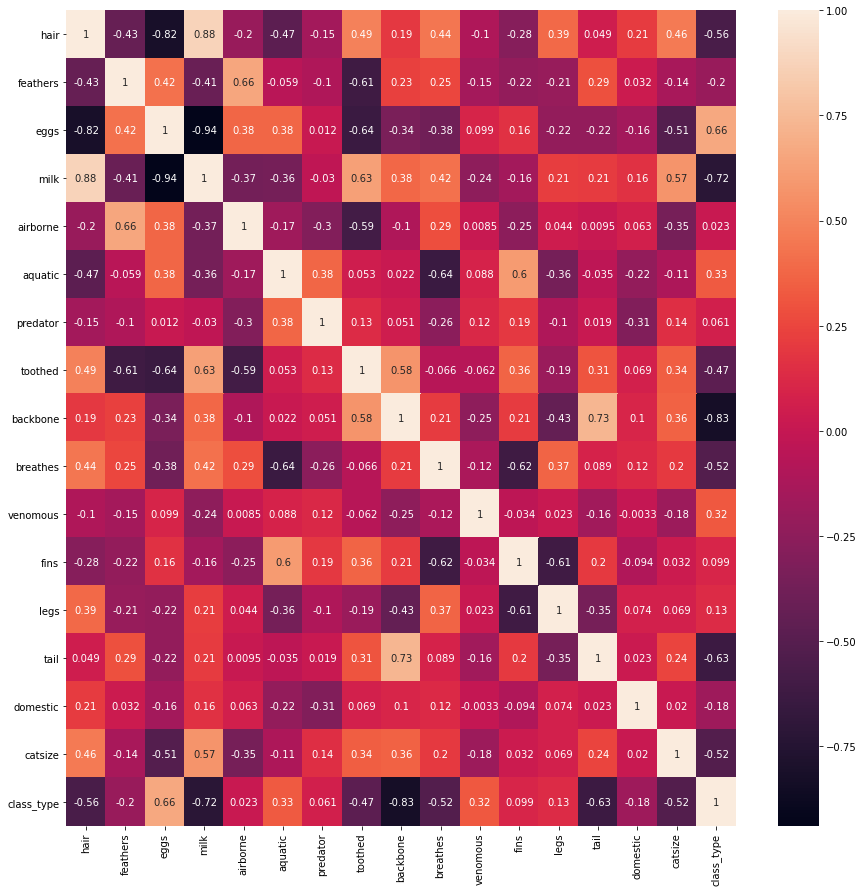

In [236]:
df_corr = df_1.corr()

plt.figure(figsize=(15,15))
sn.heatmap(df_corr, annot=True)
plt.show()

* Using df_1 data for Mammals, we can also prepare a correlation matrix for only Animal Type: Mammal. We drop the columns that are not rellevant for this animal type.

In [237]:
mammals = df_1[df_1['class_type'] == 1]
mammals = mammals.drop(columns =['backbone', 'breathes', 'venomous', 'feathers', 'milk', 'class_type'])

In [238]:
mammals_corr = mammals.corr()
mammals_corr

,hair,eggs,airborne,aquatic,predator,toothed,fins,legs,tail,domestic,catsize
hair,1.000000,0.035806,0.051282,-0.546942,-0.210450,-0.035806,-0.688737,0.632655,-0.093761,0.111499,-0.120096
eggs,0.035806,1.000000,-0.035806,0.381881,0.146938,-1.000000,-0.051988,0.083224,0.065465,-0.077850,0.083853
airborne,0.051282,-0.035806,1.000000,-0.093761,-0.243679,0.035806,-0.074458,-0.256730,0.093761,-0.111499,-0.427008
aquatic,-0.546942,0.381881,-0.093761,1.000000,0.384775,-0.381881,0.794123,-0.583945,-0.023810,-0.203859,0.219578
predator,-0.210450,0.146938,-0.243679,0.384775,1.000000,-0.146938,0.305559,-0.083176,-0.108007,-0.282968,0.334329
toothed,-0.035806,-1.000000,0.035806,-0.381881,-0.146938,1.000000,0.051988,-0.083224,-0.065465,0.077850,-0.083853
fins,-0.688737,-0.051988,-0.074458,0.794123,0.305559,0.051988,1.000000,-0.782118,-0.096429,-0.161889,0.174371
legs,0.632655,0.083224,-0.256730,-0.583945,-0.083176,-0.083224,-0.782118,1.000000,0.240283,0.156991,0.014315
tail,-0.093761,0.065465,0.093761,-0.023810,-0.108007,-0.065465,-0.096429,0.240283,1.000000,-0.144400,-0.052861
domestic,0.111499,-0.077850,-0.111499,-0.203859,-0.282968,0.077850,-0.161889,0.156991,-0.144400,1.000000,-0.036266


## Model Building

In [215]:
X = df_1.iloc[:, 1:17]
y = df_1.iloc[:, 17]

### 1. Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

* Testing the results for different C values.

In [241]:
logreg = LogisticRegression(C=1).fit(X_train, y_train)
print(f"The result for training set: {logreg.score(X_train, y_train)}")
print(f"The result for testing set: {logreg.score(X_test, y_test)}")

The result for training set: 1.0
The result for testing set: 0.9354838709677419


In [242]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f"The result for training set: {logreg100.score(X_train, y_train)}")
print(f"The result for testing set: {logreg100.score(X_test, y_test)}")

The result for training set: 1.0
The result for testing set: 0.9354838709677419


In [243]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f"The result for training set: {logreg001.score(X_train, y_train)}")
print(f"The result for testing set: {logreg001.score(X_test, y_test)}")

The result for training set: 0.4
The result for testing set: 0.41935483870967744


* C value below 1 decrease the results of the Logistic Regression model for this data set.

* Comparing the classification accuracy of the model based on actual values of Class Type.

In [244]:
logreg.predict(X)

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 6, 4, 1, 1, 4, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [245]:
np.array(y)

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

### 2. Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [247]:
print(f"The result for training set: {tree.score(X_train, y_train)}")
print(f"The result for testing set: {tree.score(X_test, y_test)}")

The result for training set: 1.0
The result for testing set: 0.967741935483871


In [248]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [249]:
print(f"The result for training set: {tree.score(X_train, y_train)}")
print(f"The result for testing set: {tree.score(X_test, y_test)}")

The result for training set: 0.9
The result for testing set: 0.8709677419354839


In [250]:
tree = DecisionTreeClassifier(min_samples_leaf=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=0)

In [251]:
print(f"The result for training set: {tree.score(X_train, y_train)}")
print(f"The result for testing set: {tree.score(X_test, y_test)}")

The result for training set: 0.9428571428571428
The result for testing set: 0.9354838709677419


In [252]:
tree = DecisionTreeClassifier(min_samples_leaf=6, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=0)

In [253]:
print(f"The result for training set: {tree.score(X_train, y_train)}")
print(f"The result for testing set: {tree.score(X_test, y_test)}")

The result for training set: 0.9142857142857143
The result for testing set: 0.967741935483871


* Higher value of min_samples_leaf parameter decreased the value of model fit and increased the value of model prediction ability.

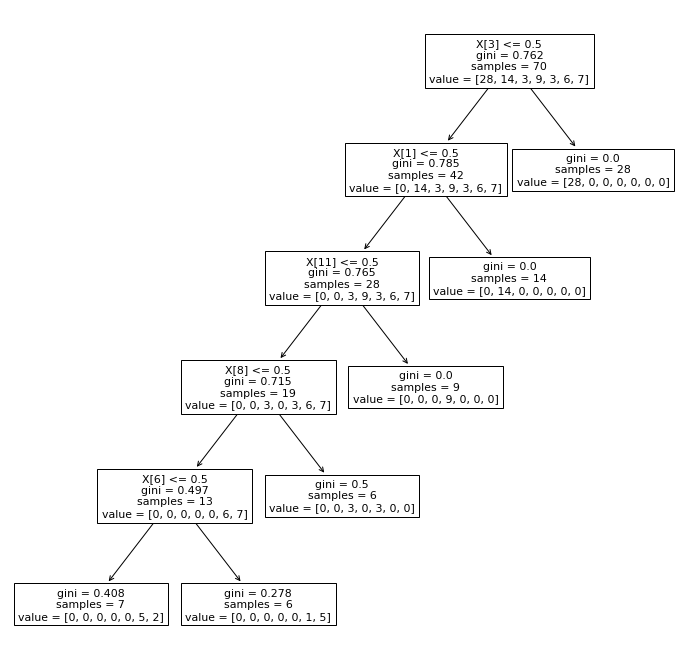

In [254]:
from sklearn.tree import plot_tree, export_graphviz
plt.figure(figsize=(12,12))
plot_tree(tree)
plt.show()